# Analysis of Spotify Top-2000 songs

### Content:
* 1.Introduction
* 2.Description of project
* 3.Research questions
* 4.Data preparation:cleaning and shaping  
* 5.Data visualization

## 1. Introduction

In the modern world, almost everyone interacts with an art form - music. Music is listened to, created, reproduced and sung. Over the years, listening to music has developed with tremendous success and today one of the most popular music services is the streaming service Spotify, with nearly 300 million users worldwide. The service contains a database of 60 million tracks of all genres. As users themselves say, this service, unlike other platforms, has many advantages, such as: a simple and convenient interface, reasonable rates for access to catalogs of various tracks, a high-quality algorithm for selecting individual playlists, easy registration and payment methods, integration with social networks, cross-platform, streaming of tracks and albums - this function affects the increase in the popularity of an artist all over the world (the more followers and the number of listens to the artist's tracks, the artist is recognizable).Those songs that achieve great success among the audience remain in memory for a long time. Their influence on people can be so great that they leave their contribution to history. Songs can sometimes show us the development of entire generations.So, main goal of the project is to research and see power of the music.

## 2. Description of project

The popularity factor is central to this research.
The analysis is based on ready dataset taken from site kaggle.com : 
(https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset).
Given dataset contains audio statistics of the top 2000 tracks on Spotify. The data contains about 15 columns each describing the track and it's qualities.Chosen tracks were released in period from 1956 to 2019 and there were included songs from some notable and famous artists like Queen, The Beatles, Guns N' Roses, etc.
This data is extracted from the Spotify playlist - Top 2000s on PlaylistMachinery(@plamere) using Selenium with Python. More specifically, it was scraped from http://sortyourmusic.playlistmachinery.com/ This data contains audio features like Danceability, BPM, Liveness, Valence(Positivity) and many more.
Each feature's description has been given in detail below.
* Index is ID.
* Title- name of the track.
* Artist- name of the artist.
* Top Genre is the genre of track.
* Year is the year that track was released.
* Beats per Minute(BPM) - The tempo of the song.
* Energy: The energy of a song - the higher the value, the more energtic song is.
* Danceability - The higher the value, the easier to dance to this song.
* Loudness - The higher the value, the louder the song is.
* Liveness - The higher the value , the more lively song hears to listener.
* Valence - The higher the value, the more positive mood for the song is.
* Length - duration of the song.
* Acoustic - The higher the value the more acoustic the song is.
* Speechiness- The higher the value the more spoken words the song contains.
* Popularity - The higher the value the more popular the song is.

##  3.Formulation of research questions

#### For detailed and deep analysis, we need to answer to the following questions:
1. Analyze the most known Artists in the world of all times
2. Analyze the most listened genres of all times
3. Analyze the in which years people had listened dance and energetic songs
4. Find trend for acousticness in songs was popular in 1960s, than they are today
5. Find which words contained in songs are more popular?

## 4.Data preparation: cleaning and shaping
for well-working with data, we need to prepare it to right format.
* find all the missing values.
* renaming some columns
* change values in column 'Genre'
* convert column Length(duration) from object to int type
* convert all the negative values in column 'loudness' to the positive
* grouping data by columns 

In [1]:
# importing useful packages
import numpy as np
import pandas as pd
import csv
import random
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# making data frame from csv file  and making the index from column "Index"
top = pd.read_csv(r"C:\Users\User\Desktop\data analytics\Project\Analysis-Spotify-Top-2000\Spotify-2000.csv",delimiter = ";",
             encoding = "utf - 8", doublequote=True, engine="python")
top.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
#show size of table- in rows and columns
top.shape

(1994, 15)

In [4]:
#showing all info about columns
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [5]:
#counting types of columns
top.dtypes.value_counts()

int64     11
object     4
dtype: int64

In [6]:
# get all the statistical derscription of numerical columns
top.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [7]:
#finding missing values on each column
top.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

#### As we see, there are no missing values compared part 1 of submission
This is because, initially, the dataset itself was incorrectly represented and damaged, and therefore I decided to format it, since creating a new dataframe with missing values and filtering them, and then joining two dataframes could not be possible due to the very damaged file with the dataset , and now that it has been formatted, all records are reflected correctly and without data missing. It was the only correct way to solve the problem,honestly.

In [8]:
#finding duplicated records in dataset
top.duplicated().sum()

0

In [9]:
#renaming columns
top1 = top.rename(columns={"Length (Duration)": "Duration (sec)"})
top1.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [10]:
#so , because we find no missing values, next we are going to modificate our data.
#in this step, we will change type and values in column "Length(Duration)"
top1['Duration (sec)'].dtype

dtype('O')

In [11]:
#replacing comma from numbers that make them string values by using replace() method
#and convert into integer by using to_numeric and apply methods
top1.replace(',','', regex=True, inplace=True)
top1['Duration (sec)']= top1['Duration (sec)'].apply(pd.to_numeric,errors='coerce')
top1['Duration (sec)'].dtype

dtype('int64')

In [12]:
#show the results
top1['Duration (sec)']

0       201
1       207
2       341
3       269
4       256
       ... 
1989    128
1990    136
1991    162
1992    324
1993    148
Name: Duration (sec), Length: 1994, dtype: int64

In [13]:
#describing the statistical part of column
top1['Duration (sec)'].describe()

count    1994.000000
mean      262.443330
std        93.604387
min        93.000000
25%       212.000000
50%       245.000000
75%       289.000000
max      1412.000000
Name: Duration (sec), dtype: float64

In [14]:
#change the column name of Top Genre
top1.rename(columns = {'Top Genre' : 'Genre'}, inplace = True)
top1.head()

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [15]:
#merging similar genres to the one general
#conert all value's lettercases to lower
genre = (top1["Genre"].str.strip()).str.lower()
top1.head(3)

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69


In [16]:
# function to split the genre column
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
    return result.str.join('')
#loop until the genre cannot be split any further
genre_m1 = genre.copy()
while(max((genre_m1.str.split(" ", 1)).str.len()) > 1):
    genre_m1 = genre_splitter(genre_m1)
len(genre_m1.unique())

68

In [17]:
genre_m1.value_counts()

rock         856
pop          333
standards    123
metal         93
indie         77
            ... 
hardcore       1
afropop        1
ccm            1
cyberpunk      1
bebop          1
Name: Genre, Length: 68, dtype: int64

In [18]:
#changing the column values to the results
top1['Genre'] = genre_m1
top1.head(5)

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,87,256,1,3,59


In [19]:
#convert negative values in "Loudness " column to positive by using abs() function
top1['Loudness (dB)'] = top1['Loudness (dB)'].abs()
top1.head(5)

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,standards,2004,157,30,53,14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,rock,2000,135,79,50,11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,hop,2001,168,69,66,9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,metal,2007,173,96,43,4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,5,10,87,256,1,3,59


In [20]:
#next, we'll define how many artists participate in our research and how many songs of these artists are in this dataset
top1['Artist'].value_counts()

Queen                  37
The Beatles            36
Coldplay               27
U2                     26
The Rolling Stones     24
                       ..
Faith No More           1
Santa Esmeralda         1
Gorki                   1
5 Seconds of Summer     1
Of Monsters and Men     1
Name: Artist, Length: 731, dtype: int64

In [21]:
#sorting songs from most to less popular
top1.sort_values(['Popularity'], ascending = False)

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
793,794,Dance Monkey,Tones and I,pop,2019,98,59,82,6,15,51,209,69,9,100
787,788,Memories,Maroon 5,pop,2019,91,32,76,7,8,57,189,84,5,98
786,787,bad guy,Billie Eilish,electropop,2019,135,43,70,11,10,56,194,33,38,95
1641,1642,All I Want for Christmas Is You,Mariah Carey,pop,1994,150,63,34,7,7,35,241,16,4,95
688,689,Believer,Imagine Dragons,rock,2017,125,78,78,4,8,67,204,6,13,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,Het Dorp - Live,Wim Sonneveld,cabaret,2015,114,44,37,15,67,45,198,82,8,15
411,412,Peter Gunn Theme,Emerson Lake & Palmer,rock,2010,131,83,43,7,92,71,217,1,3,14
624,625,Three Days In A Row,Anouk,indie,2015,171,50,36,6,16,39,254,0,3,13
773,774,Hou Vol Hou Vast,BLØF,pop,2018,86,61,51,5,8,23,295,0,2,12


In [22]:
#here we define highest value of popularity by each genre
top1.groupby(['Genre']).aggregate({'Popularity' : 'max'}).sort_values(['Popularity'], ascending = False)

,Popularity
Genre,
pop,100
electropop,95
rock,88
mellow,86
room,85
...,...
hardcore,37
prog,36
rock-and-roll,33


## 5.Data visualisation

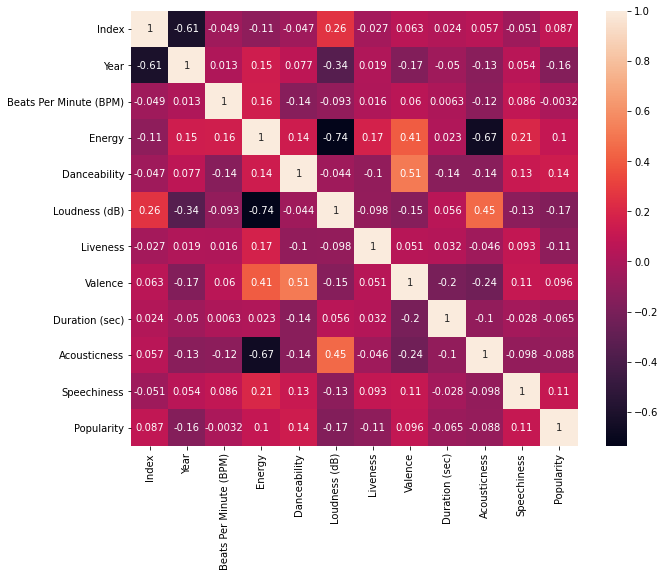

In [23]:
# before we begin visualisation of particular researching, we draw correlation matrix for all data in our analysis
plt.figure(figsize=(10,8))
corrMatrix = top1.corr()
sns.heatmap(corrMatrix, annot = True)

### 5.1 Q1: Analyze the most known Artists in the world of all times
* count amount of songs of each artist
* define artists with high marks of popularity in general term
* draw plots

In [24]:
#find most occuring artists
print(top1[['Artist', 'Popularity']].groupby('Artist')['Popularity'].count().nlargest(5).reset_index(name='top5 most occurring'))

               Artist  top5 most occurring
0               Queen                   37
1         The Beatles                   36
2            Coldplay                   27
3                  U2                   26
4  The Rolling Stones                   24


Text(0.5, 1.0, 'Amount of songs of Artists')

<Figure size 1080x504 with 0 Axes>

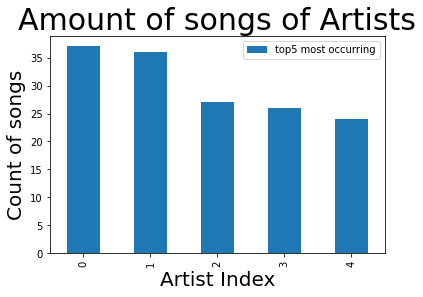

In [25]:
#draw barplot for result
fig = plt.figure(figsize = (15,7))
top1[['Artist', 'Popularity']].groupby('Artist')['Popularity'].count().nlargest(5) \
.reset_index(name='top5 most occurring').plot(kind = 'bar')
plt.xlabel('Artist Index', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Amount of songs of Artists', fontsize = 30)

In [26]:
#find top5 popular songs
print(top1[['Artist', 'Popularity']].groupby('Artist')['Popularity'].max().nlargest(5).reset_index(name='top5 most popular'))

            Artist  top5 most popular
0      Tones and I                100
1         Maroon 5                 98
2    Billie Eilish                 95
3     Mariah Carey                 95
4  Imagine Dragons                 88


Text(0.5, 1.0, 'Popular song of Artists')

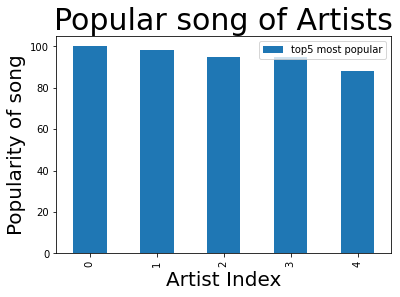

In [27]:
#draw barplot for the result
top1[['Artist', 'Popularity']].groupby('Artist')['Popularity'].max().nlargest(5) \
.reset_index(name='top5 most popular').plot(kind = 'bar')
plt.xlabel('Artist Index', fontsize = 20)
plt.ylabel('Popularity of song', fontsize = 20)
plt.title('Popular song of Artists', fontsize = 30)

So, we define that most Artists with most popular songs are Tones and I , Billie Eilish, Imagine Dragons, Maroon 5, Marriah Carey.
And most occurring artists are groups Queen,The Beatles, Coldplay,U2, the Rolling Stones

### 5.2 Q2 : Analyze the most listened genres of all times
* count amount of songs in each genre
* get genres with high marks of popularity each year  
* plot the given result

In [28]:
#Calculating the number of songs of each genre
print(type(top1['Genre']))
popular_genre=top1.groupby('Genre').size()
popular_genre.sort_values(ascending = False)

<class 'pandas.core.series.Series'>


Genre
rock           856
pop            333
standards      123
metal           93
indie           77
              ... 
electronica      1
rap              1
hardcore         1
trance           1
afropop          1
Length: 68, dtype: int64

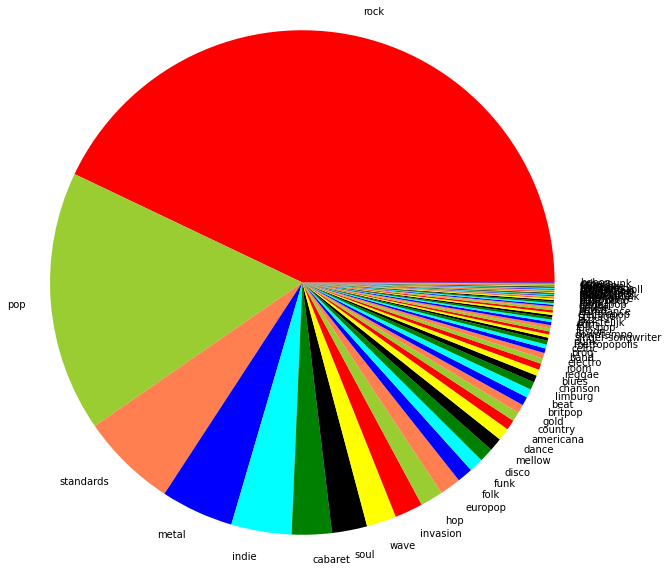

In [29]:
#draw a pieplot for result
labels = top1.Genre.value_counts().index
sizes = top1.Genre.value_counts().values
colors = ['red', 'yellowgreen', 'coral', 'blue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [30]:
#find genres with highest value of popularity
top1.groupby(['Genre']).aggregate({'Popularity' : 'max'}).sort_values('Popularity',ascending = False).head(5)

,Popularity
Genre,
pop,100
electropop,95
rock,88
mellow,86
room,85


Text(0.5, 1.0, 'Popularity of genre')

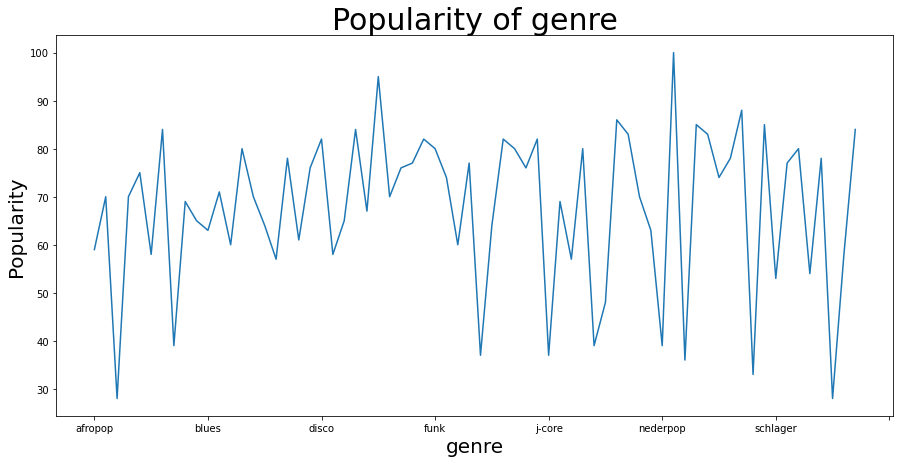

In [31]:
#draw a lineplot for result
fig, ax = plt.subplots(figsize=(15,7))
top1.groupby(['Genre']).max()['Popularity'].plot(ax = ax)
plt.xlabel('genre', fontsize = 20)
plt.ylabel('Popularity', fontsize = 20)
plt.title('Popularity of genre', fontsize = 30)

we researched that most popular genres are pop, rock, electropop,standards,metal,room, mellow

### 5.3 Q3: define in which time period people had listened more energetic songs 
*  to find this, we research data in columns 'Beats per Minute(BPM)', 'Energy ' and 'Dancebility'
*  draw a matching plots


In [32]:
#get data with highest bpm value
top1.loc[: ,'Title':'Beats Per Minute (BPM)'].sort_values('Beats Per Minute (BPM)', ascending = False).head(5)

,Title,Artist,Genre,Year,Beats Per Minute (BPM)
1426,It's The End Of The World As We Know It (And I...,R.E.M.,rock,1987,206
284,Lady Jane - (Original Single Mono Version),The Rolling Stones,rock,2004,205
1808,Road Trippin',Red Hot Chili Peppers,rock,1999,204
1218,Islands In the Stream,Dolly Parton,pop,1982,204
851,What's Going On,Marvin Gaye,soul,1971,203


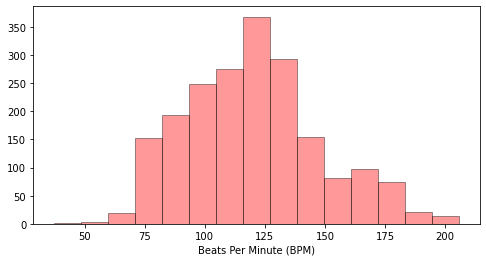

In [33]:
#draw a distribution plot
plt.figure(figsize=(8,4))
sns.distplot(top1['Beats Per Minute (BPM)'], kde=False, bins=15,color='red', hist_kws=dict(edgecolor="k", linewidth=1))
plt.show()

In [34]:
#get data with highest energy value
top1.loc[: ,'Title':'Energy'].sort_values('Energy', ascending = False).head(5)

,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy
1345,Angel Of Death,Slayer,metal,1986,90,100
23,Somebody Told Me,The Killers,rock,2004,138,99
1733,Smack My Bitch Up,The Prodigy,beat,1997,136,99
43,American Idiot,Green Day,rock,2004,186,99
1395,Welcome To The Jungle,Guns N' Roses,metal,1987,124,99


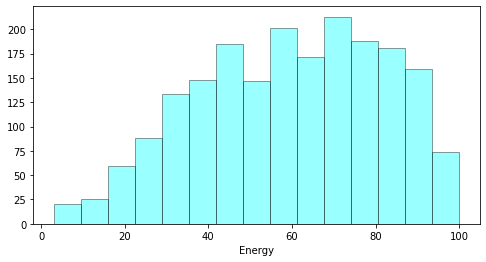

In [35]:
#draw a distribution plot
plt.figure(figsize=(8,4))
sns.distplot(top1['Energy'], kde=False, bins=15,color='aqua', hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

In [36]:
top1.loc[: ,'Title':'Danceability'].sort_values('Danceability', ascending = False).head(5)

,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability
1477,Kingston Town,UB40,fusion,1989,102,25,96
1752,Around the World,Daft Punk,electro,1997,121,80,96
282,Watskeburt?!,De Jeugd Van Tegenwoordig,hop,2008,130,49,95
192,The Real Slim Shady,Eminem,hop,2000,105,66,95
1264,Buffalo Soldier,Bob Marley & The Wailers,reggae,1983,124,46,93


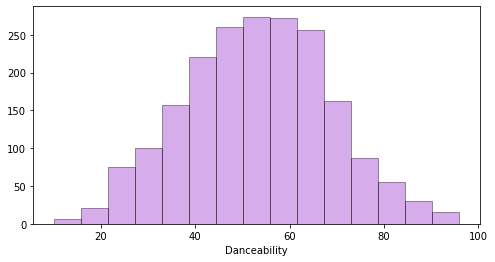

In [37]:
#draw a distribution plot
plt.figure(figsize=(8,4))
sns.distplot(top1['Danceability'], kde=False, bins=15,color='darkorchid', hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

Text(0.5, 1.0, 'Relationship between Years and Energy, Danceability and BPM')

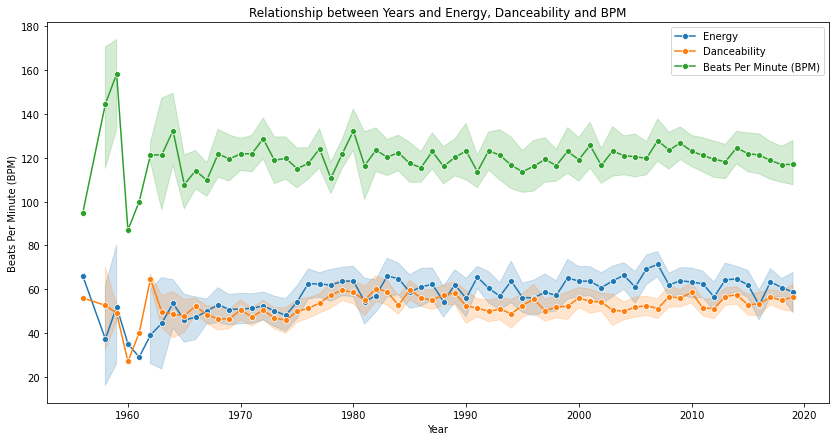

In [38]:
# Analysing the relationship between energy and year
plt.figure(figsize=(14,7))
regplot=sns.lineplot(x="Year",y='Energy',data=top1, label = 'Energy',marker='o')
regplot=sns.lineplot(x="Year",y='Danceability', data=top1, label = 'Danceability', marker='o')
regplot=sns.lineplot(x="Year",y='Beats Per Minute (BPM)',data=top1, label = 'Beats Per Minute (BPM)', marker='o')
regplot.set_title("Relationship between Years and Energy, Danceability and BPM")


found that 
* more energetic songs were listened in period 2000-2010
* more dance songs were listened in period 1970-1980
* more more beat songs were listened in period 1960-1970

### 5.4 Q4: Find if  trend for acousticness in songs was popular in 1960s, than they are today
*  to find this, we research data in column 'Acousticness'
*  draw a matching plots


In [39]:
top1[['Title','Acousticness','Year']].sort_values('Acousticness').head(5)

,Title,Acousticness,Year
1840,House Of The Rising Sun,0,1964
375,Elevation,0,2000
374,Bad Romance,0,2009
1534,Lithium,0,1991
370,Life in Technicolor ii,0,2008


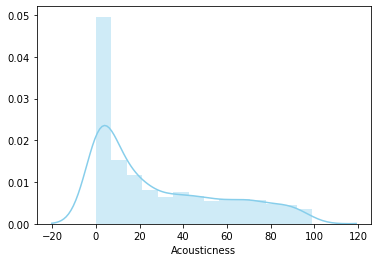

In [40]:
#draw a distplot
sns.distplot( top1['Acousticness'] , color="skyblue")

<Figure size 1152x648 with 0 Axes>

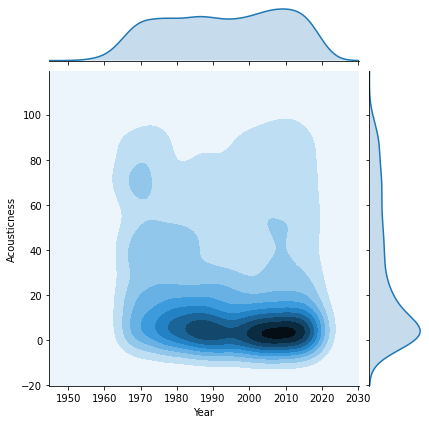

In [41]:
#joinplot for analyzing acousticness
plt.figure(figsize=(16,9))
sns.jointplot(x=top1['Year'], y=top1['Acousticness'], kind="kde")

here we can see that trend to acousticness was less in 2010s than in 1960s

## Conclusion

In this data analysis, we made a research to the top 2000 songs of Spotify music service.
We conclude that:
* firstly, we find most popular Artist and their popular songs
* second, find the most popular genres of music
* third, find trend in time periods on several characteristics of track which are- Energy, acousticness, danceability
Our analysis has shown various data that can help with more advanced research of music trends and their various indicators to improve and optimize various services such as spotify, etc.